# Coursera ML Ex1 - Linear Regression
## 1. Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

## 2. Define constants

In [2]:
# training dataset
DATA_FILE_NAME = './ex1data1.csv'
# gradient descent max step 
INTERATIONS = 1500
# learning rate
ALPHA = 0.01

## 3. Cost function

In [3]:
def compute_cost(X, y, theta):
    # number of training examples
    m = y.size
    # cost
    j = np.sum((np.dot(X, theta) - y) ** 2)
    j /= (2*m)
    return j

## 4. Gradient Descent

In [4]:
def gradient_descent(X, y, theta, alpha, num_inters):
    # number of training examples
    m = y.size
    jHistory = np.empty(num_inters)

    for i in range(num_inters):
        delta = np.dot(np.dot(X, theta) - y, X) / m
        theta -= alpha * delta
        jHistory[i] = compute_cost(X, y, theta)
    
    return theta, jHistory

## 5. Load training dataset

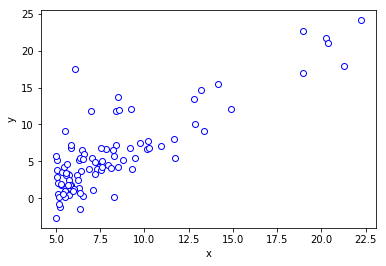

In [5]:
df = pd.read_csv(DATA_FILE_NAME)
# plot data
df.plot(x='x', y='y', legend=False, marker='o', style='o', mec='b', mfc='w')
plt.xlabel('x'); plt.ylabel('y'); plt.show()

# extract X,y
X = df.values[:,0]
y = df.values[:,1]
m = y.size # number of training examples
# add X_0 to X
X = np.concatenate((np.ones((m,1)), X.reshape(-1,1)), axis=1)

## 6. Learn parameters

In [6]:
theta, jHistory = gradient_descent(X, y, np.zeros(X.shape[1]), ALPHA, INTERATIONS)
print(theta, jHistory)

(array([-3.63029144,  1.16636235]), array([ 6.73719046,  5.93159357,  5.90115471, ...,  4.48343473,
        4.48341145,  4.48338826]))


## 7. Plot result

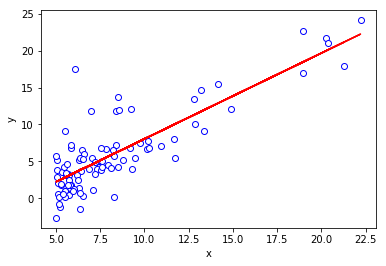

(0.45197678677017672, 4.534245012944714)


In [7]:
# training data
df.plot(x='x', y='y', legend=False, marker='o', style='o', mec='b', mfc='w')
# predicted line
y_hat = np.dot(X, theta)
plt.plot(df.values[:,0], y_hat, color='r')
plt.xlabel('x'); plt.ylabel('y'); plt.show()

# predict for 3.5 and 7.0
print(np.dot([1, 3.5], theta), np.dot([1, 7], theta))

## 8. Plot cost function J

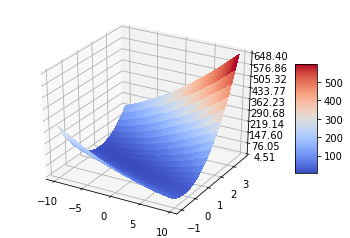

In [8]:
fig = plt.figure()

## surface
ax = fig.gca(projection='3d')

# Make data.
theta0, theta1 = np.meshgrid(np.arange(-10, 10, 0.25), np.arange(-1, 4, 0.25))
J = np.empty_like(theta0)
for i in range(theta0.shape[0]):
    for j in range(theta0.shape[1]):
        J[i, j] = compute_cost(X, y, np.array([theta0[i][j], theta1[i][j]]))

# Plot the surface.
surf = ax.plot_surface(theta0, theta1, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

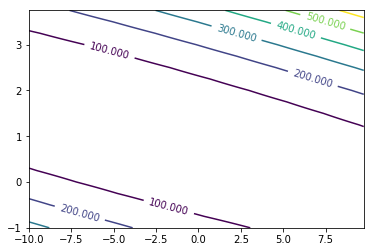

In [14]:
plt.figure()
CS = plt.contour(theta0, theta1, J)
plt.clabel(CS, inline=1, fontsize=10)

plt.show()